In [1]:
import sentinelsat
import os
import rasterio
from rasterio.plot import show
from rasterio.features import shapes
import shapely.geometry
from shapely.geometry import Polygon, Point
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from rasterio.mask import mask
from matplotlib import pyplot

In [ ]:
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date
api = SentinelAPI('username', 'password')
api 

In [2]:
#This was placed here to see if the crs of the differnt images matched
print('--')
current_dir = os.getcwd()

print(current_dir)

current_dir = os.getcwd()

path = current_dir + ''

print(path)    
print('--')

print("--")
image_filename = os.path.join(path, "C:/Users/Nem/Desktop/GIS ASSIGNMENTS/GGS Final clips/S2A_MSIL1C_20160508T185922_N0202_R013_T10TFS_20160508T191101.SAFE/GRANULE/L1C_T10TFS_A004586_20160508T191101/IMG_DATA/T10TFS_20160508T185922_TCI.jp2")

# Remember that the 4-band image is comprised of blue, green, red and near-infrared
# PlanetScope images should be in a UTM projection.
my_image = rasterio.open(image_filename)

# We can view the rasterio object as follows:
my_image

print(my_image.bounds)

print('--')
print(my_image.profile['crs'], my_image.profile['dtype'])

print('--')
data = gpd.read_file(path, crs='epsg:3857')
print(data.crs)

print('--')
data = data.to_crs('epsg:32610')
print(data.crs)
print(data.bounds)
print('--')
image_filename = os.path.join(path, "C:/Users/Nem/Desktop/GIS ASSIGNMENTS/GGS Final clips/S2A_MSIL2A_20210724T190921_N0301_R056_T10TES_20210724T233407.SAFE/GRANULE/L2A_T10TES_A031799_20210724T191630/IMG_DATA/R10m/T10TES_20210724T190921_TCI_10m.jp2")

# Remember that the 4-band image is comprised of blue, green, red and near-infrared
# PlanetScope images should be in a UTM projection.
my_image = rasterio.open(image_filename)

# We can view the rasterio object as follows:
my_image

print(my_image.bounds)

print('--')
print(my_image.profile['crs'], my_image.profile['dtype'])

print('--')
data = gpd.read_file(path, crs='epsg:3857')
print(data.crs)

print('--')
data = data.to_crs('epsg:32610')
print(data.crs)
print(data.bounds)
print("--")


--
C:\Users\Nem\Desktop\GIS ASSIGNMENTS
C:\Users\Nem\Desktop\GIS ASSIGNMENTS
--
--
BoundingBox(left=600000.0, bottom=5090220.0, right=709800.0, top=5200020.0)
--
EPSG:32610 uint8
--
epsg:32610
--
epsg:32610
       minx       miny      maxx       maxy
0  624995.0  5321305.0  625005.0  5321315.0
--
BoundingBox(left=499980.0, bottom=5090220.0, right=609780.0, top=5200020.0)
--
EPSG:32610 uint8
--
epsg:32610
--
epsg:32610
       minx       miny      maxx       maxy
0  624995.0  5321305.0  625005.0  5321315.0
--


In [ ]:
#This is the geometry of my coordinates for Glacier Peak
my_geojson = {
  "type": "Feature", #let's define our GeoJSON type. As it's a single geometry, it's just a single 'Feature'
  "geometry": {
	"type": "Polygon", #let's define our geometry type, which as we have a square, is a polygon.
	"coordinates": [ #Here are our actual geometry coordinates
	  [
		[
		  -121.42618,
		  48.24308
		],
		[
		  -120.64828,
		  48.20604
		],
		[
		  -120.68212,
		  47.95185
		],
		[
		  -121.50713,
		  47.94779
		],
		[
		  -121.42618,
		  48.24308
		]
	  ],
	]
  },
    "properties": {'id': 'Glacier Peak'}, #And an example geometry ID, although not strictly necessary for this task
}
my_geojson

footprint = geojson_to_wkt(my_geojson)
footprint

In [ ]:
#Dates for Glacier Peak
dates = [
        #('20210601', '20210831'),
        #('20200601', '20200831'),
        #('20190601', '20190831'),
        #('20180601', '20180831'),
        #('20170701', '20170719'),
        #('20160601', '20160831'),
]
for date in dates:
    products = api.query(
        footprint,
        platformname = 'Sentinel-2',
        date = date,
        cloudcoverpercentage = (0,15),
        limit=1
    )

# Now download them!!
    api.download_all(products)

In [ ]:
#Glacier peak
bands = [#"C:/Users/Nem/Desktop/GIS ASSIGNMENTS/GGS Final clips/2016_10%cloud-glacier peak/S2A_MSIL1C_20160727T185922_N0204_R013_T10UFU_20160727T190238.SAFE/GRANULE/L1C_T10UFU_A005730_20160727T190238/IMG_DATA/T10UFU_20160727T185922_TCI.jp2",
         #"C:/Users/Nem/Desktop/GIS ASSIGNMENTS/GGS Final clips/2017_10%cloud-glacier peak/S2A_MSIL1C_20170715T190911_N0205_R056_T10UFU_20170715T191515.SAFE/GRANULE/L1C_T10UFU_A010778_20170715T191515/IMG_DATA/T10UFU_20170715T190911_TCI.jp2",
         #"C:/Users/Nem/Desktop/GIS ASSIGNMENTS/GGS Final clips/2018_10%cloud-glacier peak/S2A_MSIL1C_20180816T185921_N0206_R013_T10UFU_20180903T110523.SAFE/GRANULE/L1C_T10UFU_A016455_20180816T190038/IMG_DATA/T10UFU_20180816T185921_TCI.jp2",
         #"C:/Users/Nem/Desktop/GIS ASSIGNMENTS/GGS Final clips/2019_10%cloud-glacier peak/S2B_MSIL2A_20190826T185919_N0213_R013_T10UFU_20190826T230916.SAFE/GRANULE/L2A_T10UFU_A012909_20190826T191111/IMG_DATA/R10m/T10UFU_20190826T185919_TCI_10m.jp2",
         #"C:/Users/Nem/Desktop/GIS ASSIGNMENTS/GGS Final clips/2020_10%cloud-glacier peak/S2B_MSIL2A_20200830T185919_N0214_R013_T10UFU_20200830T214737.SAFE/GRANULE/L2A_T10UFU_A018200_20200830T190346/IMG_DATA/R10m/T10UFU_20200830T185919_TCI_10m.jp2",
         #"C:/Users/Nem/Desktop/GIS ASSIGNMENTS/GGS Final clips/2021_10%cloud-glacier peak/S2B_MSIL2A_20210828T190909_N0301_R056_T10UFU_20210828T220823.SAFE/GRANULE/L2A_T10UFU_A023391_20210828T191649/IMG_DATA/R10m/T10UFU_20210828T190909_TCI_10m.jp2",
        #"C:/Users/Nem/Desktop/GIS ASSIGNMENTS/GGS Final clips/2021_10%cloud-glacier peak/S2B_MSIL2A_20210828T190909_N0301_R056_T10UFU_20210828T220823.SAFE/GRANULE/L2A_T10UFU_A023391_20210828T191649/IMG_DATA/R20m/T10UFU_20210828T190909_B03_20m.jp2"
        #"C:/Users/Nem/Desktop/GIS ASSIGNMENTS/GGS Final clips/2021_10%cloud-glacier peak/S2B_MSIL2A_20210828T190909_N0301_R056_T10UFU_20210828T220823.SAFE/GRANULE/L2A_T10UFU_A023391_20210828T191649/IMG_DATA/R20m/T10UFU_20210828T190909_B11_20m.jp2"
]
for band in bands:

    # Open our image
    my_image = rasterio.open(band)
    band1 = my_image.read(1)

    # We can then specify the part of the image we want to clip using geographic coordinates. 
    xmin = 622152.3
    ymin = 5321318.0
    xmax = 625050.6
    ymax = 5323358.6


    my_geojson = [{
        "type": "Polygon", #let's define our geometry type, which as we have a square, is a polygon.
        "coordinates": [ #Here are our actual geometry coordinates
          [
            [
              xmin,
              ymin
            ],
            [
              xmax,
              ymin
            ],
            [
              xmax,
              ymax
            ],
            [
              xmin,
              ymax
            ],
            [
              xmin,
              ymin
            ]
          ],
        ]
      }]
        
        
#     # Now we can apply the rasterio mask 
#     # We specify the function needs to crop (via crop=True)
    with rasterio.open(band) as img:
        
        clipped, transform = mask(img, my_geojson, crop=True)

#     # Great! Now you've clipped the image. 
#     # We just finally need to gather the correct updated metadata to write the new image
        
#     # Let's first copy the metadata from the original ratserio object
    meta = my_image.meta.copy()

#     # We will need to update this metadata, and provide the new clipped boundaries
    meta.update(
         {

             "transform": transform,
             "height":clipped.shape[1],
             "width":clipped.shape[2]
         }
     )
         # Now we can add a filename for our new clipped image
   # Note: We can reuse the band name
    filename_out = ''.format(band) 

In [ ]:
    # Finally, we can write the new image to a GeoTIFF (.tif)
    with rasterio.open(filename_out, 'w', **meta) as dst:
        dst.write(clipped)

    print('Writing complete for {}'.format(filename_out))

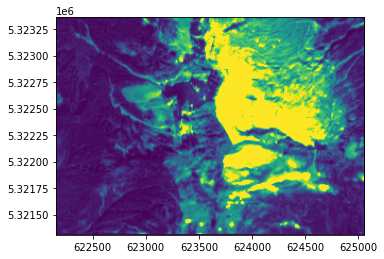

<AxesSubplot:>

In [3]:
#"GGS.Finalclipped2016.tif",#"GGS.Finalclipped2017.tif",#"GGS.Finalclipped2019.tif",#"GGS.Finalclipped2020.tif",
#"GGS.Finalclipped2021.tif"  
image_filename = "GGS.Finalclipped2021.tif"

# Remember that the 4-band image is comprised of blue, green, red and near-infrared
# PlanetScope images should be in a UTM projection.
my_image = rasterio.open(image_filename)

# We can view the rasterio object as follows:
from rasterio.plot import show
show(my_image)

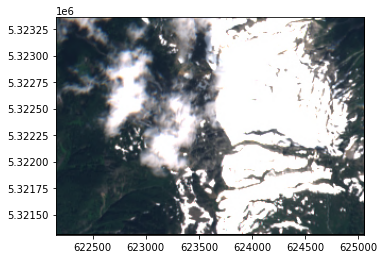

--


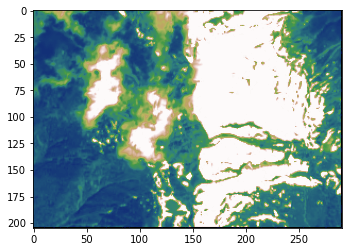

--
--
({'type': 'Polygon', 'coordinates': [[(9.0, 0.0), (9.0, 1.0), (11.0, 1.0), (11.0, 2.0), (17.0, 2.0), (17.0, 1.0), (23.0, 1.0), (23.0, 0.0), (9.0, 0.0)]]}, 1.0)
[[(36.0, 0.0), (36.0, 1.0), (37.0, 1.0), (37.0, 0.0), (36.0, 0.0)]]
--
[[622515.0, 5323355.0], [622515.0, 5323345.0], [622525.0, 5323345.0], [622525.0, 5323355.0], [622515.0, 5323355.0]]
Output contains 1767 shapes
----
In this dataframe we have 1767 shapes.
^^^^^^^^^^^^


<AxesSubplot:>

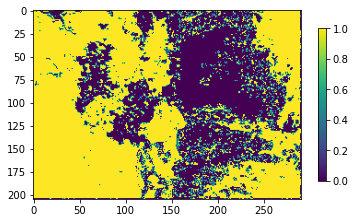

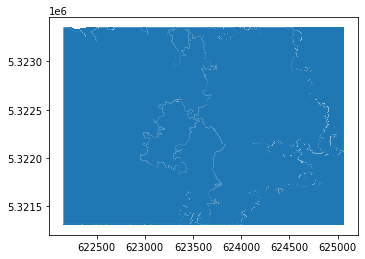

In [6]:
my_image = rasterio.open('GGS.Finalclipped2017.tif')

#"GGS.Finalclipped2016.tif",#"GGS.Finalclipped2017.tif",#"GGS.Finalclipped2019.tif",#"GGS.Finalclipped2020.tif",
#"GGS.Finalclipped2021.tif"


show(my_image.read(), transform=my_image.transform)

#print(my_image.profile['crs'], my_image.profile['dtype'])

#----------

red = my_image.read(1)
green = my_image.read(2)
blue = my_image.read(3)
#fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
#plt.show(my_image.read(3), ax=ax1, cmap='Blues')
#plt.show(my_image.read(2), ax=ax2, cmap='Greens')
#plt.show(my_image.read(1), ax=ax3, cmap='Reds')
print('--')

#this shows my snow cover well
fig = pyplot.imshow(green) #create the figure
fig.set_cmap('gist_earth') #set the color map, hence `set_cmap()`
pyplot.show() #display our image
print('--')

#change data type
red = np.float32(red)
green = np.float32(green)
blue = np.float32(blue)
print('--')
water_index = np.zeros(blue.shape)

#research says that red band and blue will make snow come out more 
water_index[(red < green) |  (red > 70) & (red < 120)] = 1

plt.imshow(water_index)
plt.colorbar(shrink=0.7)

water_index = water_index.astype('float32')

my_shapes = shapes(water_index)

for my_shape in my_shapes:
    print(my_shape)
    break 
output_folder = 'GGS_Final_shapes'
def transform_coordinates(pair):
    """
    This function takes a pair of raster coordinates 
    and returns the geographic coordinates. 
    
    """
    geo_coords = my_image.xy(pair[1],pair[0])

    return [geo_coords[0], geo_coords[1]]

# Loop over the shapes we created
for river in my_shapes:

    print(river[0]['coordinates'])
    print('--')
    

    coordinates = [transform_coordinates(pair) for pair in river[0]['coordinates'][0]]

    print(coordinates)
    
    break

output = []


for river_shape in my_shapes:

    coords = river_shape[0]['coordinates'][0]

    # Transform the raster coordinates into geographic coordinates
    geographic_coords = [transform_coordinates(pair) for pair in coords]


    output.append({
        'geometry' : {
            'type':'Polygon',
            'coordinates': [geographic_coords],
            },
        'properties': {},
    }) 

print('Output contains {} shapes'.format(len(output)))

data_to_write = gpd.GeoDataFrame.from_features(output, crs='epsg:32610')

data_to_write.to_file('GGSFinal2017.shp')
#GGSFinal2016.shp, GGSFinal2017.shp, GGSFinal2019.shp, GGSFinal2020.shp, GGSFinal2021.shp
data = gpd.read_file('GGSFinal2017.shp')

print('----')
print('In this dataframe we have {} shapes.'.format(len(data)))
print('^^^^^^^^^^^^')
#print(my_image.profile['crs'], my_image.profile['dtype'])
data.plot()



In [7]:
path = current_dir + '/GGS_Final_shapes/GGSFinal2016.shp'
#/GGSFinal2016.shp, /GGSFinal2017.shp, /GGSFinal2019.shp, /GGSFinal2020.shp, /GGSFinal2021.shp
print(path)    

print(my_image.profile['crs'], my_image.profile['dtype'])

C:\Users\Nem\Desktop\GIS ASSIGNMENTS/GGS_Final_shapes/GGSFinal2016.shp
EPSG:32610 uint8


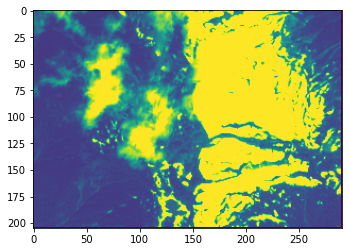

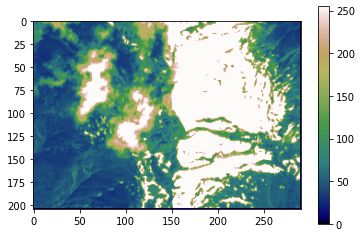

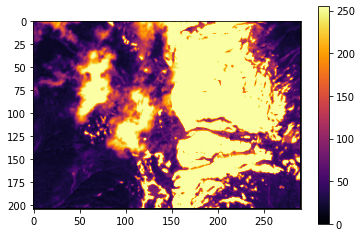

In [8]:
fig = pyplot.imshow(blue)
pyplot.show()

fig = pyplot.imshow(green) #create the figure
fig.set_cmap('gist_earth') #set the color map, hence `set_cmap()`
pyplot.colorbar() #add the colorbar to our plot
pyplot.show() #display our image

fig = pyplot.imshow(red) #create the figure
fig.set_cmap('inferno') #set the color map, hence `set_cmap()`
pyplot.colorbar() #add the colorbar to our plot
pyplot.show() #display our image


In [10]:
#this where im getting the area of the shps
import os

current_dir = os.getcwd()

years = ['2016', '2017', '2019', '2020','2021']

for year in years:

    path = current_dir + "/GGS_Final_shapes/GGS{}/GGSFinal{}.shp".format(year,year)

    print(path)    

    import geopandas as gpd
    nems_data = gpd.read_file(path, crs='epsg:3857') 
    print(nems_data)

    nems_data = nems_data.to_crs('epsg:32610')
    nems_data['area'] = nems_data['geometry'].area /1e6
    print(nems_data['area'].sum())


    overall_area_km2 = 0

    for row in nems_data.iterrows():

        area_km2 = (row[1]['geometry'].area / 1e6)
    #     print(row[1]['geometry'].area)

        ##this will round our area to 1 decimal place
    #     area_km2 = round(area_km2, 1)

        overall_area_km2 += area_km2

    print("The area of {} Glacier is {} square kilometers".format(year, overall_area_km2))





C:\Users\Nem\Desktop\GIS ASSIGNMENTS/GGS_Final_shapes/GGS2016/GGSFinal2016.shp
       FID                                           geometry
0        0  POLYGON ((623885.000 5323355.000, 623895.000 5...
1        1  POLYGON ((624015.000 5323355.000, 624025.000 5...
2        2  POLYGON ((624035.000 5323355.000, 624155.000 5...
3        3  POLYGON ((624175.000 5323355.000, 624205.000 5...
4        4  POLYGON ((624225.000 5323355.000, 624235.000 5...
...    ...                                                ...
1532  1532  POLYGON ((624535.000 5321315.000, 624555.000 5...
1533  1533  POLYGON ((624595.000 5321315.000, 624655.000 5...
1534  1534  POLYGON ((624665.000 5321315.000, 624905.000 5...
1535  1535  POLYGON ((624925.000 5321315.000, 625015.000 5...
1536  1536  POLYGON ((625025.000 5321315.000, 625065.000 5...

[1537 rows x 2 columns]
6.464799999999999
The area of 2016 Glacier is 6.464799999999992 square kilometers
C:\Users\Nem\Desktop\GIS ASSIGNMENTS/GGS_Final_shapes/GGS2017/GGSFinal

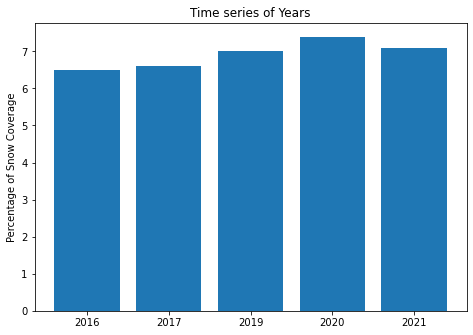

In [12]:
%matplotlib inline
import rasterio
from rasterio.plot import show_hist
import numpy
import math
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib.pyplot as pl




#Title to graph would be time series / y axis title percentage of snow coverage area
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Time series of Years')
years = ['2016', '2017', '2019', '2020','2021']
areakm2_snow_coverage = [6.5,6.6,7,7.4,7.1]
ax.bar(years,areakm2_snow_coverage)
plt.ylabel('Percentage of Snow Coverage')
plt.show()